In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

## Load Data

In [87]:
df = pd.read_csv('loansdata.csv')

In [88]:
df

,id,amount_requested,amount_funded_by_investor,interest_rate,loan_length,loan_purpose,debt_to_income_ratio,home_ownership,monthly_income,open_credit_lines,revolving_credit_balance,inquiries_in_last_six_mths,employment_length
0,81174.0,20000,20000.00,0.09,36.0,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1.0
1,99592.0,19200,19200.00,0.12,36.0,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2.0
2,80059.0,35000,35000.00,0.22,60.0,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2.0
3,15825.0,10000,9975.00,0.10,36.0,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5.0
4,33182.0,12000,12000.00,0.12,36.0,credit_card,0.19,RENT,3195.00,11,14469,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,23735.0,30000,29950.00,0.17,60.0,debt_consolidation,0.19,MORTGAGE,9250.00,15,45880,1,8.0
2496,65882.0,16000,16000.00,0.14,60.0,home_improvement,0.22,OWN,8903.25,18,18898,1,10.0
2497,55610.0,10000,10000.00,0.14,36.0,debt_consolidation,0.05,MORTGAGE,2166.67,4,4544,0,10.0
2498,38576.0,6000,6000.00,0.12,36.0,major_purchase,0.17,RENT,3500.00,8,1275,0,5.0


In [89]:
df.describe()

,id,amount_requested,amount_funded_by_investor,interest_rate,loan_length,debt_to_income_ratio,monthly_income,open_credit_lines,revolving_credit_balance,inquiries_in_last_six_mths,employment_length
count,2499.000000,2500.000000,2500.000000,2500.000000,2498.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2422.000000
mean,51643.325330,12389.590000,11984.346044,0.130396,41.265012,0.153752,5685.153348,10.060800,15225.668800,0.910400,5.492155
std,30053.637661,7814.420929,7743.480223,0.041301,9.933753,0.075164,3963.376189,4.516687,18308.723678,1.235064,3.443013
min,10.000000,1000.000000,200.000000,0.050000,36.000000,0.000000,588.500000,2.000000,0.000000,0.000000,1.000000
25%,26570.500000,6000.000000,6000.000000,0.100000,36.000000,0.100000,3474.267500,7.000000,5545.250000,0.000000,2.000000
50%,50673.000000,10000.000000,10000.000000,0.130000,36.000000,0.150000,5000.000000,9.000000,10938.000000,1.000000,5.000000
75%,77583.000000,17000.000000,16000.000000,0.160000,36.000000,0.210000,6800.000000,13.000000,18870.250000,1.000000,10.000000
max,104202.000000,35000.000000,35000.000000,0.250000,60.000000,0.350000,102750.000000,38.000000,270800.000000,9.000000,10.000000


## Find Missing Value

In [90]:
df.isnull().sum()

id                             1
amount_requested               0
amount_funded_by_investor      0
interest_rate                  0
loan_length                    2
loan_purpose                   1
debt_to_income_ratio           0
home_ownership                 1
monthly_income                 0
open_credit_lines              0
revolving_credit_balance       0
inquiries_in_last_six_mths     0
employment_length             78
dtype: int64

In [91]:
#employment_length has most missing values
df[df['employment_length'].isnull()]

,id,amount_requested,amount_funded_by_investor,interest_rate,loan_length,loan_purpose,debt_to_income_ratio,home_ownership,monthly_income,open_credit_lines,revolving_credit_balance,inquiries_in_last_six_mths,employment_length
91,67629.0,16000,15925.0,0.08,36.0,debt_consolidation,0.06,MORTGAGE,6000.00,8,19539,0,NaN
92,51929.0,9525,9500.0,0.16,36.0,small_business,0.11,RENT,2666.67,15,5610,1,NaN
105,84563.0,8000,8000.0,0.08,36.0,other,0.00,MORTGAGE,3500.00,7,0,1,NaN
111,64884.0,9000,9000.0,0.06,36.0,vacation,0.06,MORTGAGE,9583.33,11,675,0,NaN
116,85644.0,10000,10000.0,0.10,36.0,debt_consolidation,0.09,MORTGAGE,3333.33,8,8940,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,72919.0,2875,2875.0,0.18,36.0,credit_card,0.14,RENT,1084.00,3,3824,0,NaN
2423,103374.0,3700,3600.0,0.08,36.0,other,0.10,MORTGAGE,4985.00,6,11586,4,NaN
2449,79164.0,20950,20950.0,0.23,60.0,debt_consolidation,0.13,RENT,10416.67,14,12460,3,NaN
2465,45424.0,12000,11950.0,0.06,36.0,home_improvement,0.10,OWN,3100.00,7,11076,0,NaN


In [92]:
#we need to drop all 78 rows
df=df.dropna(how ='any')

In [93]:
#Null values removed
df.isnull().sum()

id                            0
amount_requested              0
amount_funded_by_investor     0
interest_rate                 0
loan_length                   0
loan_purpose                  0
debt_to_income_ratio          0
home_ownership                0
monthly_income                0
open_credit_lines             0
revolving_credit_balance      0
inquiries_in_last_six_mths    0
employment_length             0
dtype: int64

In [94]:
df.shape
#new shape of data from 2500 to 2417

(2417, 13)

## Handling outliers

In [101]:
df.columns

Index(['id', 'amount_requested', 'amount_funded_by_investor', 'interest_rate',
       'loan_length', 'loan_purpose', 'debt_to_income_ratio', 'home_ownership',
       'monthly_income', 'open_credit_lines', 'revolving_credit_balance',
       'inquiries_in_last_six_mths', 'employment_length'],
      dtype='object')

<AxesSubplot:xlabel='monthly_income'>

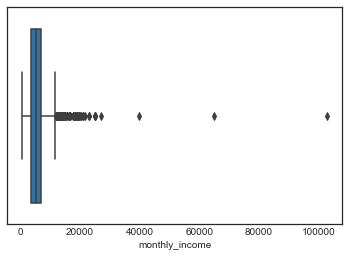

In [102]:
sns.boxplot(x=df['monthly_income'])


<AxesSubplot:xlabel='loan_length'>

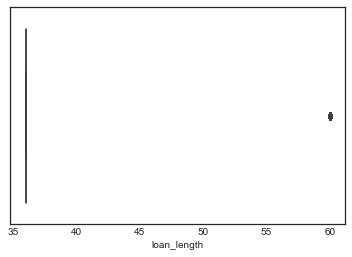

In [103]:
sns.boxplot(x=df['loan_length'])

<AxesSubplot:xlabel='debt_to_income_ratio'>

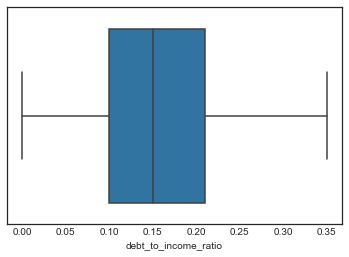

In [104]:
sns.boxplot(x=df['debt_to_income_ratio'])


<AxesSubplot:xlabel='open_credit_lines'>

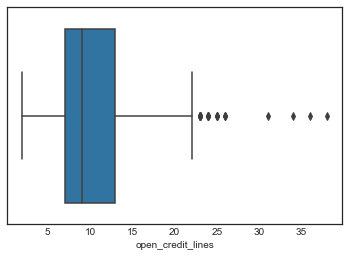

In [105]:
sns.boxplot(x=df['open_credit_lines'])


<AxesSubplot:xlabel='revolving_credit_balance'>

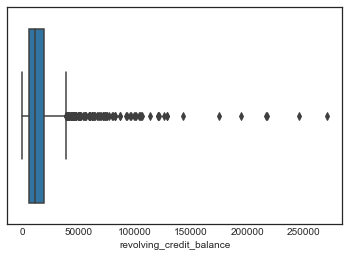

In [106]:
sns.boxplot(x=df['revolving_credit_balance'])


<AxesSubplot:xlabel='inquiries_in_last_six_mths'>

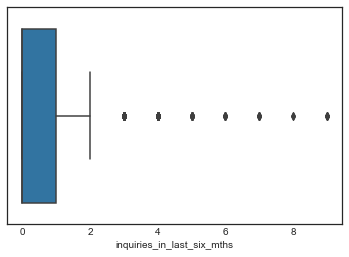

In [107]:
sns.boxplot(x=df['inquiries_in_last_six_mths'])

###### using IQR

In [108]:

q1=df.quantile(0.25)
q3=df.quantile(0.75)
q1,q3

(id                            26120.0
 amount_requested               6000.0
 amount_funded_by_investor      6000.0
 interest_rate                     0.1
 loan_length                      36.0
 debt_to_income_ratio              0.1
 monthly_income                 3500.0
 open_credit_lines                 7.0
 revolving_credit_balance       5591.0
 inquiries_in_last_six_mths        0.0
 employment_length                 2.0
 Name: 0.25, dtype: float64,
 id                            77240.00
 amount_requested              17000.00
 amount_funded_by_investor     16175.00
 interest_rate                     0.16
 loan_length                      36.00
 debt_to_income_ratio              0.21
 monthly_income                 6833.33
 open_credit_lines                13.00
 revolving_credit_balance      18978.00
 inquiries_in_last_six_mths        1.00
 employment_length                10.00
 Name: 0.75, dtype: float64)

In [109]:
iqr=q3-q1

In [110]:
ll=q1-1.5*iqr
ul=q3+1.5*iqr
ll,ul

(id                           -50560.000
 amount_requested             -10500.000
 amount_funded_by_investor     -9262.500
 interest_rate                     0.010
 loan_length                      36.000
 debt_to_income_ratio             -0.065
 monthly_income                -1499.995
 open_credit_lines                -2.000
 revolving_credit_balance     -14489.500
 inquiries_in_last_six_mths       -1.500
 employment_length               -10.000
 dtype: float64,
 id                            153920.000
 amount_requested               33500.000
 amount_funded_by_investor      31437.500
 interest_rate                      0.250
 loan_length                       36.000
 debt_to_income_ratio               0.375
 monthly_income                 11833.325
 open_credit_lines                 22.000
 revolving_credit_balance       39058.500
 inquiries_in_last_six_mths         2.500
 employment_length                 22.000
 dtype: float64)

In [111]:
df[(df < ll)|(df > ul)]

C:\Users\itsas\AppData\Local\Temp/ipykernel_17640/3475694623.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[(df < ll)|(df > ul)]


,id,amount_requested,amount_funded_by_investor,interest_rate,loan_length,loan_purpose,debt_to_income_ratio,home_ownership,monthly_income,open_credit_lines,revolving_credit_balance,inquiries_in_last_six_mths,employment_length
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,35000.0,35000.0,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,45880.0,NaN,NaN
2496,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
#removing values
df= df[((df < ll)|(df > ul)).any(axis=1)]

C:\Users\itsas\AppData\Local\Temp/ipykernel_17640/135394765.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df= df[((df < ll)|(df > ul)).any(axis=1)]


In [113]:
df

,id,amount_requested,amount_funded_by_investor,interest_rate,loan_length,loan_purpose,debt_to_income_ratio,home_ownership,monthly_income,open_credit_lines,revolving_credit_balance,inquiries_in_last_six_mths,employment_length
2,80059.0,35000,35000.0,0.22,60.0,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2.0
7,22090.0,33500,33450.0,0.17,60.0,credit_card,0.15,MORTGAGE,13863.42,12,27874,0,10.0
12,41200.0,28000,27975.0,0.22,60.0,debt_consolidation,0.13,MORTGAGE,14166.67,12,10311,0,1.0
13,83869.0,35000,34950.0,0.09,36.0,debt_consolidation,0.20,RENT,9166.67,19,21536,0,1.0
15,21399.0,25000,24975.0,0.16,60.0,debt_consolidation,0.22,RENT,5416.67,6,13929,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,52330.0,15000,15000.0,0.20,36.0,wedding,0.18,RENT,8000.00,6,45976,1,2.0
2489,63256.0,19075,19075.0,0.19,36.0,debt_consolidation,0.15,RENT,5166.67,17,13749,3,10.0
2493,74047.0,30000,30000.0,0.23,60.0,other,0.12,MORTGAGE,7083.33,16,17969,1,10.0
2495,23735.0,30000,29950.0,0.17,60.0,debt_consolidation,0.19,MORTGAGE,9250.00,15,45880,1,8.0


## converting categorical variable to numerical values

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
le = LabelEncoder()

In [116]:
df.loan_purpose = le.fit_transform(df.loan_purpose)
df.home_ownership = le.fit_transform(df.home_ownership)

In [117]:
df

,id,amount_requested,amount_funded_by_investor,interest_rate,loan_length,loan_purpose,debt_to_income_ratio,home_ownership,monthly_income,open_credit_lines,revolving_credit_balance,inquiries_in_last_six_mths,employment_length
2,80059.0,35000,35000.0,0.22,60.0,2,0.24,0,11500.00,14,21977,1,2.0
7,22090.0,33500,33450.0,0.17,60.0,1,0.15,0,13863.42,12,27874,0,10.0
12,41200.0,28000,27975.0,0.22,60.0,2,0.13,0,14166.67,12,10311,0,1.0
13,83869.0,35000,34950.0,0.09,36.0,2,0.20,4,9166.67,19,21536,0,1.0
15,21399.0,25000,24975.0,0.16,60.0,2,0.22,4,5416.67,6,13929,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,52330.0,15000,15000.0,0.20,36.0,12,0.18,4,8000.00,6,45976,1,2.0
2489,63256.0,19075,19075.0,0.19,36.0,2,0.15,4,5166.67,17,13749,3,10.0
2493,74047.0,30000,30000.0,0.23,60.0,9,0.12,0,7083.33,16,17969,1,10.0
2495,23735.0,30000,29950.0,0.17,60.0,2,0.19,0,9250.00,15,45880,1,8.0


In [ ]:
#x=df.drop(['interest_rate','id'], axis=1)
#y=df['interest_rate']

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)


## usnig Correlation to find relation to drop columns

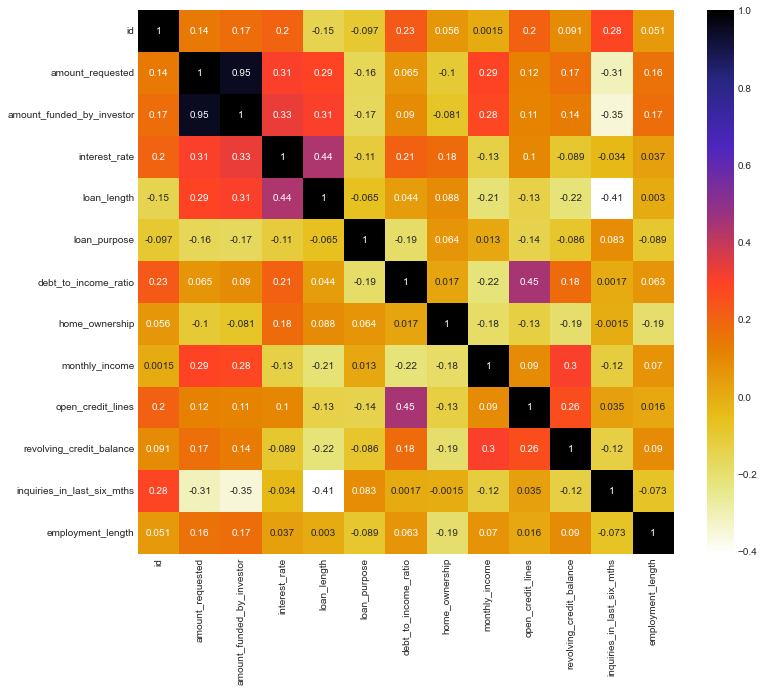

In [37]:
plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### define X and Y

In [143]:
x=df.drop(['interest_rate','id','amount_requested',''], axis=1) #removing 'amount_requested' because high corr
y=df['interest_rate']

In [144]:
x.head()

,amount_funded_by_investor,loan_length,loan_purpose,debt_to_income_ratio,home_ownership,monthly_income,open_credit_lines,revolving_credit_balance,employment_length
2,35000.0,60.0,2,0.24,0,11500.00,14,21977,2.0
7,33450.0,60.0,1,0.15,0,13863.42,12,27874,10.0
12,27975.0,60.0,2,0.13,0,14166.67,12,10311,1.0
13,34950.0,36.0,2,0.20,4,9166.67,19,21536,1.0
15,24975.0,60.0,2,0.22,4,5416.67,6,13929,9.0


In [145]:
y.head()

2     0.22
7     0.17
12    0.22
13    0.09
15    0.16
Name: interest_rate, dtype: float64

### spliting train and test data

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [147]:
x_train.shape

(622, 9)

In [148]:
y_train.shape

(622,)

<AxesSubplot:>

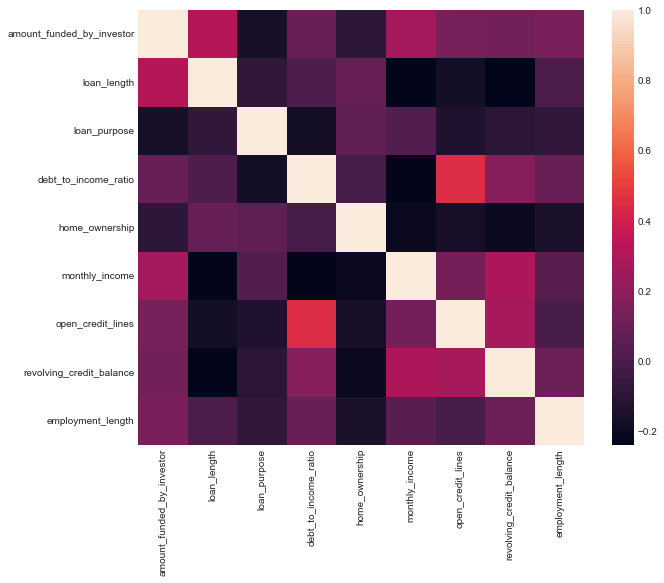

In [149]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train.corr())

In [150]:
x_train.columns

Index(['amount_funded_by_investor', 'loan_length', 'loan_purpose',
       'debt_to_income_ratio', 'home_ownership', 'monthly_income',
       'open_credit_lines', 'revolving_credit_balance', 'employment_length'],
      dtype='object')

C:\Users\itsas\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


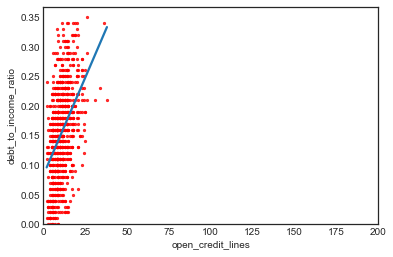

In [151]:
sns.regplot(df.open_credit_lines, df.debt_to_income_ratio, order=1, ci=None, scatter_kws={'color':'r', 's':5})
plt.xlim(0,200)
plt.ylim(ymin=0);

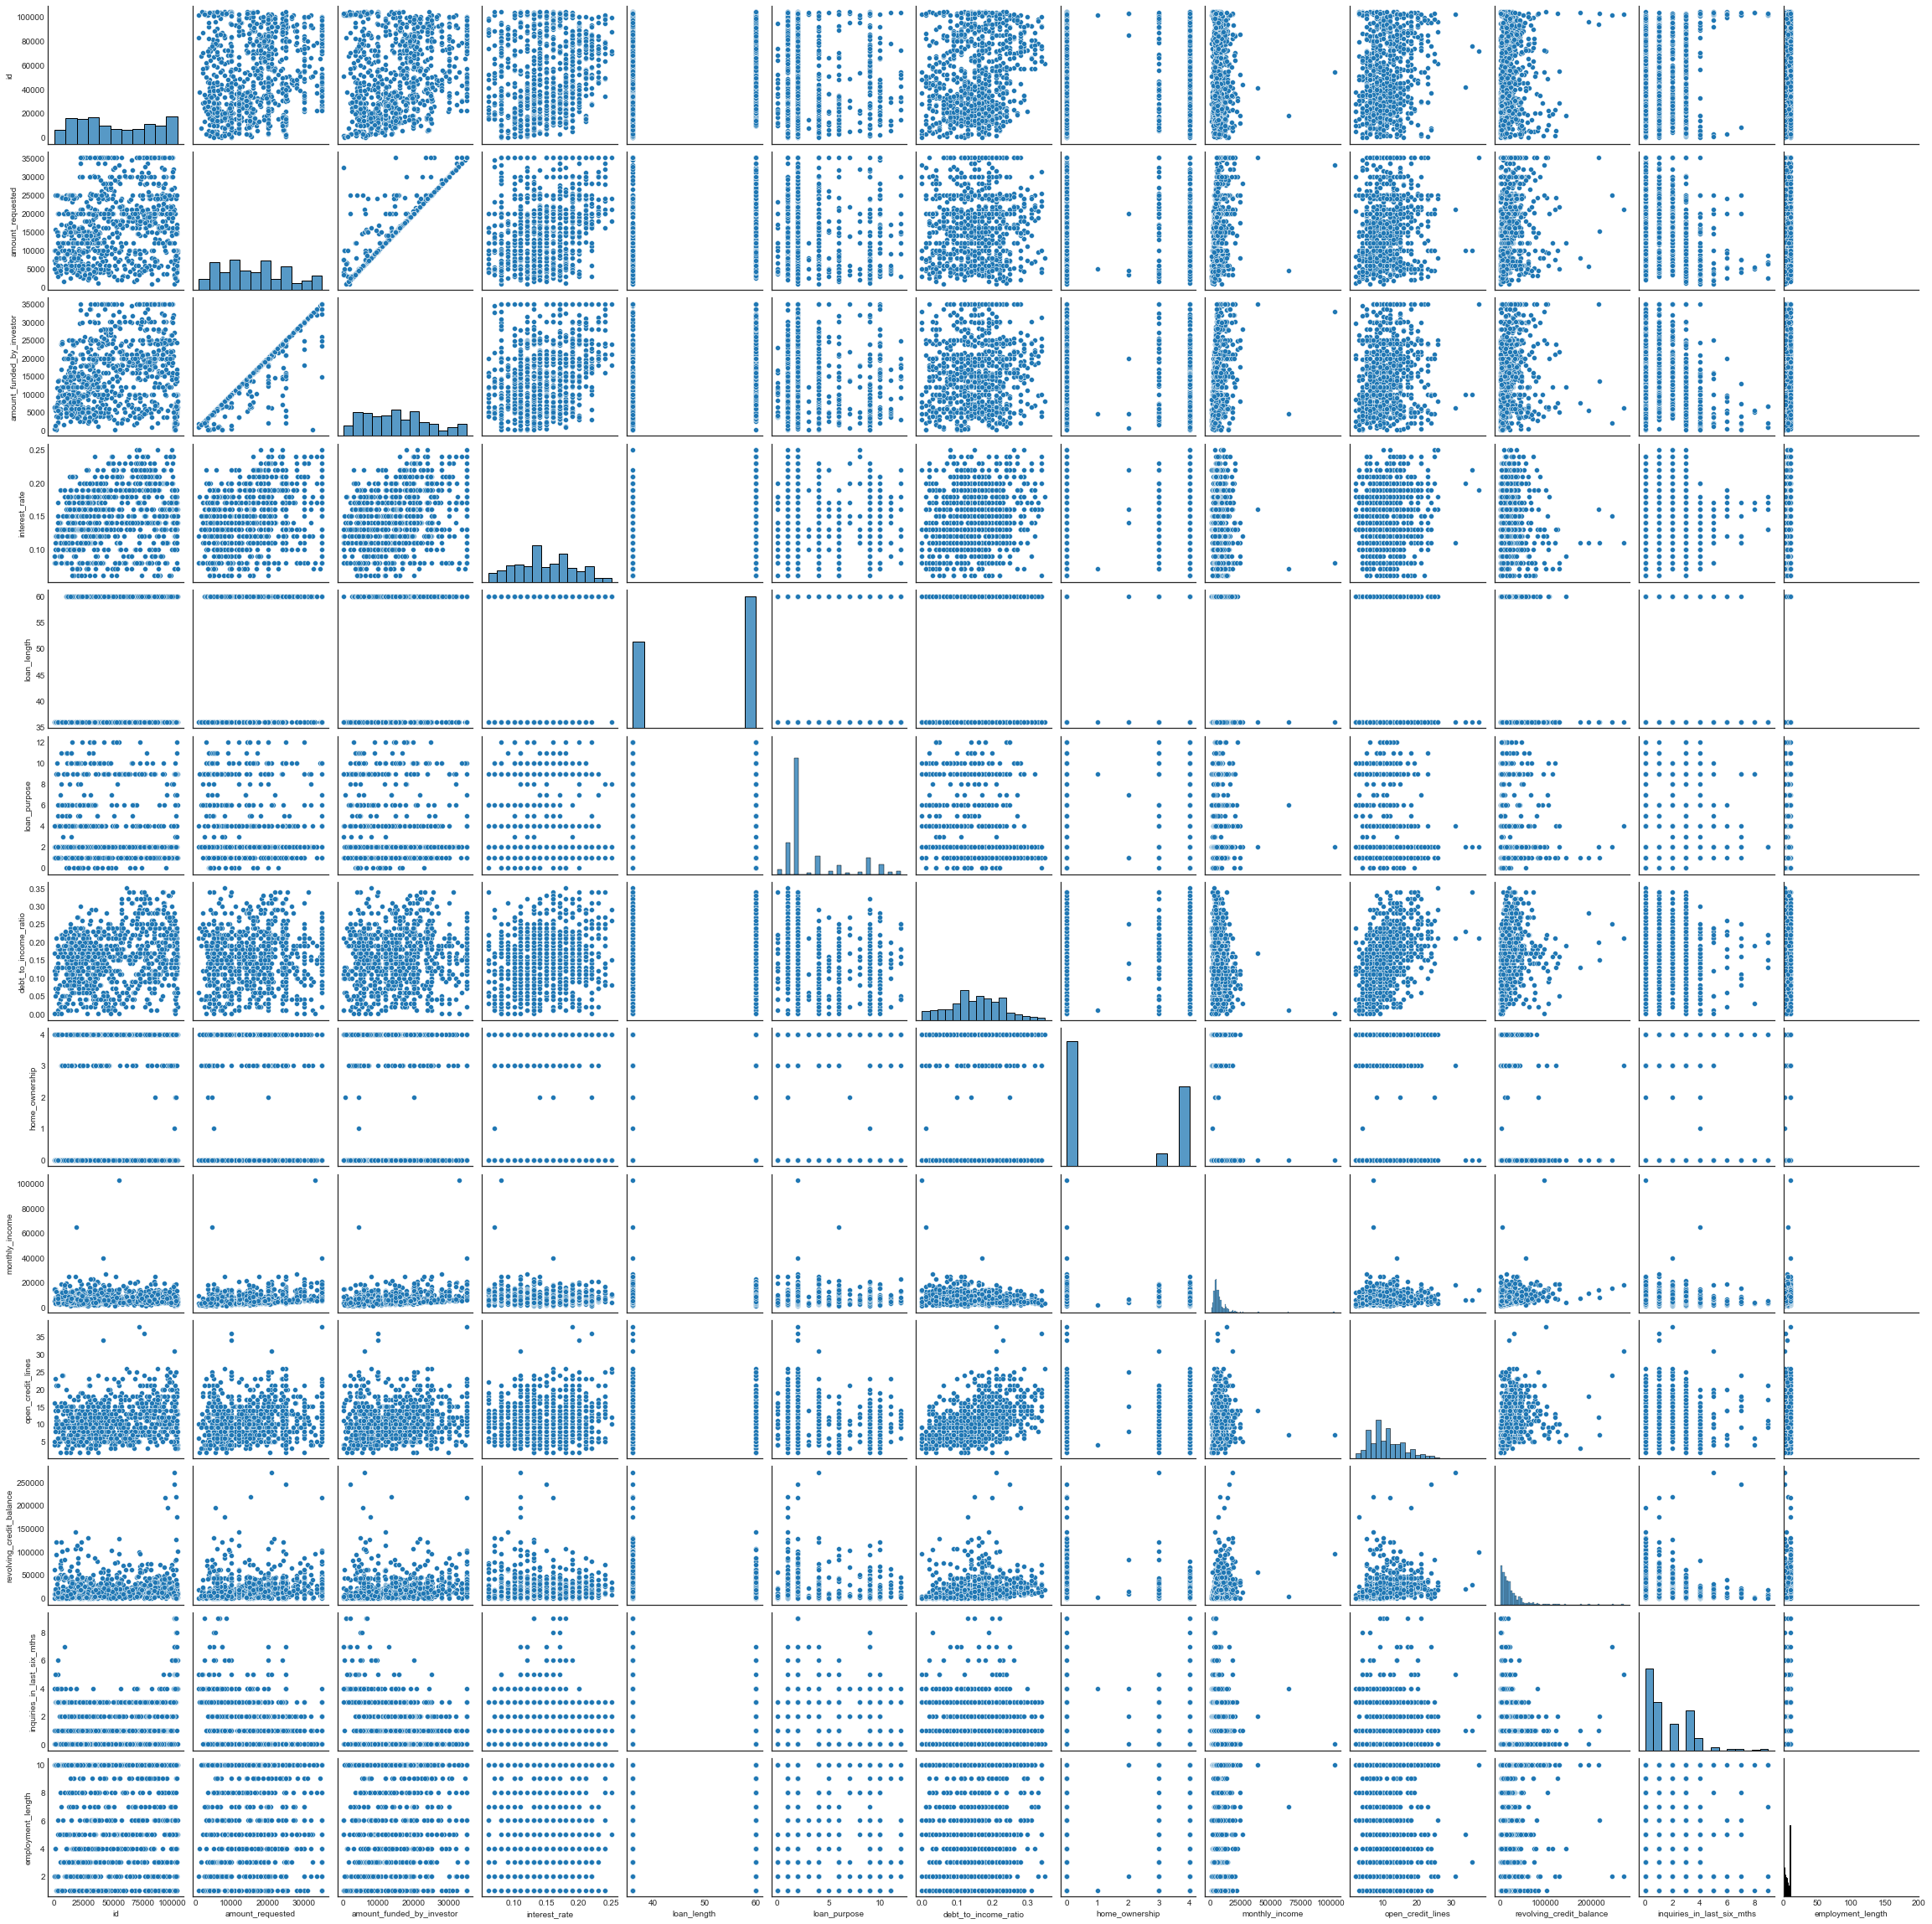

In [142]:
sns.pairplot(df)
plt.xlim(0,200)
plt.ylim(ymin=0);

#### performing regression

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
lr = LinearRegression()
lr

LinearRegression()

In [158]:
lr.fit(x_train,y_train)

LinearRegression()

### Model Valuation

In [162]:
# intercept(b)
print(lr.intercept_)

0.03973394629213106


In [164]:
#coffcients (a1,a2,a3...)
print(lr.coef_)

coeff_df = pd.DataFrame(lr.coef_,x_test.columns,columns=['Coefficient'])
coeff_df

[ 1.17834058e-06  1.23268970e-03 -7.01039910e-04  6.53826514e-02
  3.95615677e-03 -6.62591382e-07  1.30783098e-03 -3.64830471e-08
  6.58007392e-04]


,Coefficient
amount_funded_by_investor,1.178341e-06
loan_length,1.232690e-03
loan_purpose,-7.010399e-04
debt_to_income_ratio,6.538265e-02
home_ownership,3.956157e-03
monthly_income,-6.625914e-07
open_credit_lines,1.307831e-03
revolving_credit_balance,-3.648305e-08
employment_length,6.580074e-04


In [165]:
y_pred = lr.predict(x_test)
print(y_pred)

[0.10798437 0.14126416 0.15532766 0.16100125 0.15680523 0.16585382
 0.15192883 0.13168603 0.12946793 0.19989454 0.11569924 0.1199915
 0.13468625 0.1808024  0.18174422 0.14618439 0.10866906 0.15251883
 0.15865549 0.1643575  0.09882569 0.16178864 0.14274134 0.10569722
 0.16974224 0.14899208 0.18195439 0.15383143 0.10734502 0.1102694
 0.09114868 0.16321008 0.13315759 0.18170842 0.1076996  0.11374678
 0.18317874 0.17523084 0.15533737 0.12938866 0.16566424 0.18783264
 0.16995094 0.16455423 0.10599558 0.12449018 0.1090593  0.12308181
 0.110566   0.13326548 0.17057518 0.18141242 0.1410174  0.1529006
 0.14850337 0.10842166 0.16565195 0.1619474  0.18301294 0.16042761
 0.16281449 0.14407487 0.1409787  0.13010875 0.11102561 0.10450239
 0.14179963 0.1636545  0.13850707 0.14266821 0.12505338 0.13165332
 0.17591721 0.1779161  0.10496624 0.10526657 0.14710297 0.15844702
 0.11123093 0.15468369 0.16196087 0.17489884 0.16635716 0.15434188
 0.1757987  0.13951045 0.15890191 0.19995574 0.1336694  0.1434709

In [170]:
Rsquared = r2_score(y_test , y_pred)
Rsquared

0.2432782172491328

In [179]:
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)

Mean_Squared_Error : 0.0014638637410846049
Root_Mean_Squared_Error : 0.038260472306083794


In [180]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
39,0.12,0.107984
454,0.15,0.141264
2144,0.18,0.155328
2092,0.15,0.161001
1390,0.13,0.156805
...,...,...
1761,0.16,0.161384
2300,0.16,0.108231
200,0.16,0.149488
2479,0.16,0.155235


In [171]:
x_train.columns

Index(['amount_funded_by_investor', 'loan_length', 'loan_purpose',
       'debt_to_income_ratio', 'home_ownership', 'monthly_income',
       'open_credit_lines', 'revolving_credit_balance', 'employment_length'],
      dtype='object')

In [175]:
est = smf.ols('y_train ~ amount_funded_by_investor + loan_length + loan_purpose + debt_to_income_ratio + home_ownership + monthly_income + open_credit_lines + revolving_credit_balance + employment_length ', x_train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     32.49
Date:                Fri, 27 May 2022   Prob (F-statistic):           1.10e-46
Time:                        16:03:33   Log-Likelihood:                 1185.6
No. Observations:                 622   AIC:                            -2351.
Df Residuals:                     612   BIC:                            -2307.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0397      0.010      3.984      0.000       0.020       0.059
amount_funded_by_investor  1.178e-06   1.89e-07      6.237      0.000    8.07e-07    1.55e-06
loan_length                   0.0012      0.000      8.486      0.000       0.001       0.002
loan_purpose                 -0.0007      0.001     -1.375      0.170      -0.002       0.000
debt_to_income_ratio          0.0654      0.024      2.743      0.006       0.019       0.112
home_ownership                0.0040      0.001      4.947      0.000       0.002       0.006
monthly_income            -6.626e-07    3.7e-07     -1.792      0.074   -1.39e-06    6.37e-08
open_credit_lines             0.0013      0.000      3.826      0.000       0.001       0.002
revolving_credit_balance  -3.648e-08   5.85e-08     -0.624      0.533   -1.51e-07    7.84e-08
employment_length             0.0007      0.000      1.534      0.126      -0.000       0.002
==============================================================================
Omnibus:                        8.300   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.331
Skew:                          -0.026   Prob(JB):                       0.0696
Kurtosis:                       2.549   Cond. No.                     6.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""